Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from google.colab import files 
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


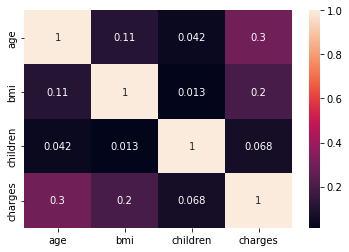

In [ ]:
plt.figure
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show() #check for multicolliniarity

In [ ]:
LE = LabelEncoder()
CategoryList = df.select_dtypes(include="object").columns
print(CategoryList)

Index(['sex', 'smoker', 'region'], dtype='object')


In [ ]:
for i in CategoryList:
    df[i] = LE.fit_transform(df[i])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
df.isna().values.any()

False

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
X = df.drop(['charges'],axis = 1)
y = df['charges']

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.6,0.0,0.666667
3,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.0,0.0,0.333333


In [ ]:
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [ ]:
x0 = np.ones((len(X),1))
X = np.append(x0,X,axis = 1)
X

array([[1.        , 0.02173913, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.2       , 0.        ,
        0.66666667],
       [1.        , 0.2173913 , 1.        , ..., 0.6       , 0.        ,
        0.66666667],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [1.        , 0.06521739, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.93478261, 0.        , ..., 0.        , 1.        ,
        0.33333333]])

Hypothesis function

In [ ]:
theta = np.zeros((X.shape[1]))
print("theta",theta)

def hypothesis(X,theta):
  H = np.dot(X,theta.T)
  return H

H = hypothesis(X,theta)
H

theta [0. 0. 0. 0. 0. 0. 0.]


array([0., 0., 0., ..., 0., 0., 0.])

Cost function

In [ ]:
def costfunction(X,y,theta):
  m = len(X)
  H = hypothesis(X,theta)
  J = (H-(y.T))**2
  Jsum = J.sum()/m
  return Jsum

In [ ]:
J = costfunction(X,y,theta)
J

322646873.5887047

Gradient descent

In [ ]:
def gradientdescent(X,y,theta,alpha,num_iterations):
  m = len(y)
  theta = np.zeros((X.shape[1]))
  error = []
  for i in range(num_iterations):
    J = costfunction(X,y,theta)
    error.append(J)
    H = hypothesis(X,theta)
    delta = np.dot((H-(y.T)),X) 
    deltasum = (np.sum(delta,axis = 0)/m)*alpha
    theta = theta-deltasum
    return theta,error

In [ ]:
iterations = 1000
alpha = 0.1
theta,error = gradientdescent(X,y,theta,alpha,iterations)
theta  

array([4953.28045784, 4953.28045784, 4953.28045784, 4953.28045784,
       4953.28045784, 4953.28045784, 4953.28045784])

In [ ]:
yPred = hypothesis(X,theta)
print(yPred)

[16558.64779366 16572.76757758 19528.26953061 ... 11039.27234671
 11540.88100217 17934.93563677]


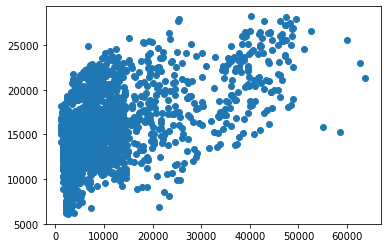

In [ ]:
plt.scatter(y,yPred)

R2 score



In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X,y)
yPred = reg.predict(X)
reg.score(X,y)

0.7507372027994937